In [102]:
import numpy as np
import csv
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [103]:
with open('./admission.txt', 'r') as f:
    reader = csv.reader(f)
    X = []
    y = []
    for row in reader:
        x1, x2, lbl = float(row[0]), float(row[1]), float(row[2])
        X.append([x1, x2])
        y.append(lbl)
X = np.array(X)
y = np.array(y)
 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

In [104]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(70, 2)
(30, 2)
(70,)
(30,)


In [105]:
def classify(X, y, example, k):
    '''
    :param X: zbiór (uczący) danych postaci ndarray (m, n), gdzie m to liczba przykładów, a n liczba cech
    :param y: zbiór wartości (labels) w postaci wektora ndarray (m, ). Każdy z elementów ma wartość 0 lub 1
    :param example: wektor cech danego przykładu postaci ndarray (n, )
    :param k: parametr k algorytmu knn
    :return: predykcja klasy przykładu. 0 lub 1
    '''
    
    # 1. iteruj po wszystkich przykładach ze zbioru uczącego - X
    #     a. dla każdego z przykładów oblicz dystans między aktualnie rozważanym przykładem uczącym a przykładem example, który jest poddany klasyfikacji
    #     b. zapisz w kolekcji parę (dystans, klasa przykładu uczącego)
    # 2. posortuj kolekcję względem dystansów, rosnąco
    # 3. wybierz k pierwszych elementów (k najkrótszych dystansów)
    # 4. klasa rozważanego przykładu example będzie taka jak większość wśród k przykładów z najkrótszym dystansem
 
    list_of_distances = np.zeros((X.shape[0], 2))
 
    for idx, x in enumerate(X):
        distance = np.sqrt((x[0] - example[0]) ** 2 + (x[1] - example[1]) ** 2)
        list_of_distances[idx, 0] = distance
        list_of_distances[idx, 1] = y[idx]
            
        
    list_of_distances = np.array(sorted(list_of_distances, key = lambda pair: pair[0]))
    
    num_of_0 = 0
    num_of_1 = 0
    
    for i in range(k):
        if list_of_distances[i, 1] == 0:
            num_of_0 += 1
        else:
            num_of_1 += 1
    
    if num_of_0 > num_of_1:
        return 0
    else:
        return 1

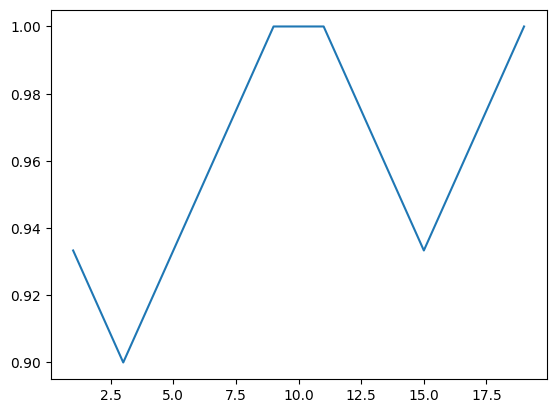

In [107]:
k_examples = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
accuracy_tab = []

for k in k_examples:
    y_pred = np.zeros(y_test.shape)
    for example_idx, example in enumerate(x_test):
        pred = classify(x_train, y_train, example, k)
        y_pred[example_idx] = pred
        
    temp = np.where(y_pred == y_test, 1, 0)
    
    accuracy = np.sum(temp) / y_test.shape[0]
    accuracy_tab.append(accuracy)
    
plt.figure()
plt.plot(k_examples, accuracy_tab)
    